In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import statsmodels
import patsy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

#Import model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
calendar_df = pd.read_csv('drive/MyDrive/Rakamin/Dataset Final Project/calendar.csv')
listings_df = pd.read_csv('drive/MyDrive/Rakamin/Dataset Final Project/listings.csv')
reviews_df = pd.read_csv('drive/MyDrive/Rakamin/Dataset Final Project/reviews.csv')

In [ ]:
listings_df.tail()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3813,8101950,https://www.airbnb.com/rooms/8101950,2.016010e+13,1/4/2016,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...,none,We're located near lots of family fun. Woodlan...,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.3
3814,8902327,https://www.airbnb.com/rooms/8902327,2.016010e+13,1/4/2016,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...,none,The neighborhood is a quiet oasis that is clos...,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3815,10267360,https://www.airbnb.com/rooms/10267360,2.016010e+13,1/4/2016,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",NaN,"Very comfortable lower unit. Quiet, charming m...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3816,9604740,https://www.airbnb.com/rooms/9604740,2.016010e+13,1/4/2016,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,Fully furnished unit to accommodate most needs...,Cozy studio condo in the heart on Madison Park...,none,Madison Park offers a peaceful slow pace upsca...,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,NaN
3817,10208623,https://www.airbnb.com/rooms/10208623,2.016010e+13,1/4/2016,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",NaN,"All hardwood floors, fireplace, 65"" TV with Xb...",none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN


In [ ]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [ ]:
listings_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3818.0,5.550111e+06,2.962660e+06,3.335000e+03,3.258256e+06,6.118244e+06,8.035127e+06,1.034016e+07
scrape_id,3818.0,2.016010e+13,0.000000e+00,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13,2.016010e+13
host_id,3818.0,1.578556e+07,1.458382e+07,4.193000e+03,3.275204e+06,1.055814e+07,2.590309e+07,5.320861e+07
host_listings_count,3816.0,7.157757e+00,2.862815e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.020000e+02
host_total_listings_count,3816.0,7.157757e+00,2.862815e+01,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,5.020000e+02
latitude,3818.0,4.762896e+01,4.305195e-02,4.750509e+01,4.760942e+01,4.762360e+01,4.766269e+01,4.773336e+01
longitude,3818.0,-1.223331e+02,3.174451e-02,-1.224172e+02,-1.223543e+02,-1.223289e+02,-1.223108e+02,-1.222406e+02
accommodates,3818.0,3.349398e+00,1.977599e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
bathrooms,3802.0,1.259469e+00,5.903691e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
bedrooms,3812.0,1.307712e+00,8.833949e-01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00


In [ ]:
# Remove currency symbols and convert 'price' to numeric in listings_df
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Remove currency symbols and convert 'price' to numeric in calendar_df
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Fill missing values with median in calendar_df
calendar_df['price'].fillna(calendar_df['price'].median(), inplace=True)

# Fill missing values in listings_df
listings_df['reviews_per_month'].fillna(listings_df['reviews_per_month'].median(), inplace=True)

# Fill missing values in reviews_df
reviews_df['comments'].fillna('No Comments', inplace=True)

# Check missing values after handling
calendar_missing_values_after = calendar_df.isnull().sum()
listings_missing_values_after = listings_df.isnull().sum()
reviews_missing_values_after = reviews_df.isnull().sum()

# Display results after filling missing values
print("Missing values after handling:")
print(calendar_missing_values_after)
print(listings_missing_values_after)
print(reviews_missing_values_after)

# Convert 'date' columns to datetime
calendar_df['date'] = pd.to_datetime(calendar_df['date'], errors='coerce')
reviews_df['date'] = pd.to_datetime(reviews_df['date'], errors='coerce')

# Standardize categorical values in 'room_type'
listings_df['room_type'] = listings_df['room_type'].str.strip().str.lower()

# Remove extra spaces in 'reviewer_name'
reviews_df['reviewer_name'] = reviews_df['reviewer_name'].str.strip().str.title()

# Check for duplicates
print("Duplikasi pada calendar_df:", calendar_df.duplicated().sum())
print("Duplikasi pada listings_df:", listings_df.duplicated().sum())
print("Duplikasi pada reviews_df:", reviews_df.duplicated().sum())

# Drop duplicates based on the correct column name
listings_df.drop_duplicates(subset=['id'], inplace=True)
reviews_df.drop_duplicates(subset=['reviewer_id'], inplace=True)

# Check statistics after cleaning
print("Statistik setelah pembersihan calendar_df:")
print(calendar_df.describe())

print("Statistik setelah pembersihan listings_df:")
print(listings_df.describe())

print("Statistik setelah pembersihan reviews_df:")
print(reviews_df.describe())

# Check for duplicates after cleaning
print("Duplikasi setelah pembersihan calendar_df:", calendar_df.duplicated().sum())
print("Duplikasi setelah pembersihan listings_df:", listings_df.duplicated().sum())
print("Duplikasi setelah pembersihan reviews_df:", reviews_df.duplicated().sum())

# Check missing values after cleaning
print("Missing values setelah pembersihan calendar_df:")
print(calendar_df.isnull().sum())

print("Missing values setelah pembersihan listings_df:")
print(listings_df.isnull().sum())

print("Missing values setelah pembersihan reviews_df:")
print(reviews_df.isnull().sum())


Missing values after handling:
listing_id    0
date          0
available     0
price         0
dtype: int64
id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
                                   ..
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 92, dtype: int64
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64
Duplikasi pada calendar_df: 0
Duplikasi pada listings_df: 0
Duplikasi pada reviews_df: 0
Statistik setelah pembersihan calendar_df:
         listing_id                           date         price
count  1.393570e+06                        1393570  1.393570e+06
mean   5.550111e+06  2016-07-04 00:00:00.000000256  1.284107

# **1. Model Selection 25 Poin**

Identifikasi Jenis Masalah:
- memprediksi harga sewa
  Model regresi linier bisa digunakan sebagai langkah awal untuk memeriksa hubungan sederhana antara fitur (seperti ukuran properti, lokasi, dll.) dan harga sewa. Namun, jika ada banyak fitur non-linear atau interaksi antara fitur, Random Forest atau Gradient Boosting akan lebih tepat karena dapat menangani hubungan yang lebih kompleks
  
- klasifikasi ulasan:
  Support Vector Machine (SVM) bisa menjadi pilihan yang baik, terutama jika kita memiliki fitur teks dan ingin mengklasifikasikan ulasan sebagai positif atau negatif. Untuk dataset besar, model berbasis deep learning seperti LSTM (Long Short-Term Memory) atau BERT bisa dipertimbangkan untuk memahami konteks lebih dalam

Berdasarkan pemahaman tentang data dan tujuan proyek, jika masalahnya adalah prediksi harga sewa, Random Forest atau Gradient Boosting lebih disarankan karena keduanya dapat menangani data yang lebih kompleks dan memiliki kemampuan menangani fitur non-linear. Random Forest sangat baik jika dataset memiliki banyak fitur dan hubungan yang tidak linear.
Jika tujuan Anda adalah klasifikasi ulasan, menggunakan SVM dengan kernel RBF atau menggunakan model berbasis deep learning seperti LSTM untuk analisis teks adalah pilihan yang baik karena keduanya dapat menangani data teks yang besar dan kompleks dengan baik.

# **2. Model Training 25 Poin**

# **Prediksi Harga**

# **Linear Regression**

In [ ]:
# Mengimpor library tambahan
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Memilih fitur yang relevan untuk model
# Menggunakan fitur seperti 'bedrooms', 'beds', 'host_listings_count', dan 'zipcode'
X = listings_df[['bedrooms', 'beds', 'host_listings_count', 'zipcode']]
y = listings_df['price']

# Menangani nilai kategori dalam 'zipcode' menggunakan LabelEncoder
label_encoder = LabelEncoder()
X['zipcode'] = label_encoder.fit_transform(X['zipcode'])

# Mengisi missing values pada fitur yang masih memiliki nilai kosong
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NameError: name 'listings_df' is not defined

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.datasets import make_regression

# Membangun model regresi linier
linear_model = LinearRegression()

# Melatih model dengan data latih
linear_model.fit(X_train, y_train)

# Memprediksi harga sewa dengan data uji
y_pred = linear_model.predict(X_test)

# Menilai performa model menggunakan Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) untuk regresi linier: {mae}")

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE) untuk regresi linier: {rmse}")

# Menghitung Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE) untuk regresi linier: {mape}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk melakukan cross-validation dengan scoring yang sesuai
cv_mae = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# K-Fold Cross Validation untuk MAPE
cv_mape = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Menampilkan hasil cross-validation
print(f"K-Fold Cross-Validation MAE: {-cv_mae.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation RMSE: {-cv_rmse.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation MAPE: {-cv_mape.mean()}")  # Karena scoring menggunakan nilai negatif


Mean Absolute Error (MAE) untuk regresi linier: 44.764399457429576
Root Mean Squared Error (RMSE) untuk regresi linier: 67.35945929496981
Mean Absolute Percentage Error (MAPE) untuk regresi linier: 44.067887706930776
K-Fold Cross-Validation MAE: 45.440623544553894
K-Fold Cross-Validation RMSE: 68.40994933161168
K-Fold Cross-Validation MAPE: 0.44221895212574597


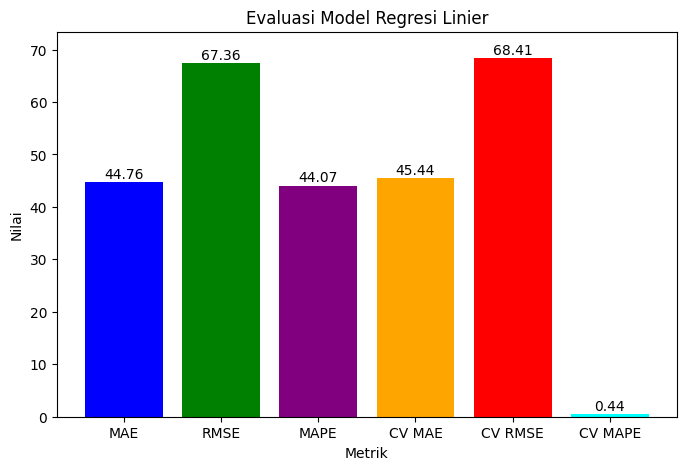

In [ ]:
# Menyusun metrik dan nilai yang akan divisualisasikan
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [mae, rmse, mape, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Membuat bar plot untuk visualisasi
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'cyan'])

# Menambahkan judul dan label
plt.title('Evaluasi Model Regresi Linier')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.ylim(0, max(values) + 5)  # Mengatur batas atas agar ada ruang untuk menampilkan nilai di atas bar

# Menambahkan nilai di atas setiap bar
for i in range(len(values)):
    plt.text(i, values[i] + 0.2, round(values[i], 2), ha='center', va='bottom')

# Menampilkan plot
plt.show()

# **GridSearchCV untuk Linear Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.pipeline import make_pipeline

# Menentukan parameter grid untuk pencarian
param_grid = {
    'linearregression__fit_intercept': [True, False],  # Targeting the LinearRegression step in the pipeline
}

# Membuat pipeline untuk scaling dan regresi linier
linear_model = make_pipeline(StandardScaler(), LinearRegression())

# Menerapkan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(estimator=linear_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melatih model dengan pencarian grid
grid_search.fit(X_train, y_train)

# Menampilkan hasil pencarian terbaik
print("Best hyperparameters using GridSearchCV: ", grid_search.best_params_)

# Memprediksi harga sewa dengan data uji menggunakan model terbaik
y_pred_grid = grid_search.predict(X_test)

# Menghitung MAE dan RMSE untuk model terbaik
mae_grid = mean_absolute_error(y_test, y_pred_grid)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))

print(f"Mean Absolute Error (MAE) untuk regresi linier setelah GridSearchCV: {mae_grid}")
print(f"Root Mean Squared Error (RMSE) untuk regresi linier setelah GridSearchCV: {rmse_grid}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_grid = mean_absolute_percentage_error(y_test, y_pred_grid)
print(f"Mean Absolute Percentage Error (MAPE) untuk regresi linier setelah GridSearchCV: {mape_grid}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi model menggunakan cross_val_score untuk MAE dan RMSE
cv_mae = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf,
                           scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil cross-validation
print(f"K-Fold Cross-Validation MAE: {-cv_mae.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation RMSE: {-cv_rmse.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation MAPE: {-cv_mape.mean()}")  # Karena scoring menggunakan nilai negatif


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters using GridSearchCV:  {'linearregression__fit_intercept': True}
Mean Absolute Error (MAE) untuk regresi linier setelah GridSearchCV: 44.764399457429576
Root Mean Squared Error (RMSE) untuk regresi linier setelah GridSearchCV: 67.35945929496981
Mean Absolute Percentage Error (MAPE) untuk regresi linier setelah GridSearchCV: 44.06788770693077
K-Fold Cross-Validation MAE: 45.4406235445539
K-Fold Cross-Validation RMSE: 68.40994933161167
K-Fold Cross-Validation MAPE: 44.22189521257461


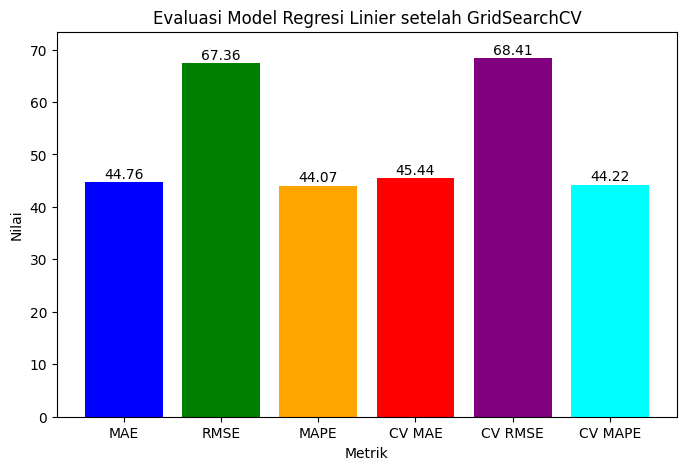

In [ ]:
# Adding MAPE to the metrics and values
metrics_grid = ['MAE', 'RMSE','MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values_grid = [mae_grid, rmse_grid, mape_grid, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Creating the bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics_grid, values_grid, color=['blue', 'green', 'orange', 'red', 'purple', 'cyan'])
plt.title('Evaluasi Model Regresi Linier setelah GridSearchCV')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.ylim(0, max(values_grid) + 5)

# Adding values on top of each bar
for i in range(len(values_grid)):
    plt.text(i, values_grid[i] + 0.2, round(values_grid[i], 2), ha='center', va='bottom')

# Display the plot
plt.show()



# **RandomizedSearchCV untuk Linear Regression**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, KFold


# Menentukan distribusi parameter untuk pencarian acak
param_dist = {
    'linearregression__fit_intercept': [True, False],  # Targeting the LinearRegression step in the pipeline
}

# Membuat pipeline dengan StandardScaler yang sudah disesuaikan
linear_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

# Menerapkan RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=linear_model, param_distributions=param_dist,
                                   n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Melatih model dengan pencarian acak
random_search.fit(X_train, y_train)

# Menampilkan hasil pencarian terbaik
print("Best hyperparameters using RandomizedSearchCV: ", random_search.best_params_)

# Memprediksi harga sewa dengan data uji menggunakan model terbaik
y_pred_random = random_search.predict(X_test)

# Menghitung MAE dan RMSE untuk model terbaik
mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))

print(f"Mean Absolute Error (MAE) untuk regresi linier setelah RandomizedSearchCV: {mae_random}")
print(f"Root Mean Squared Error (RMSE) untuk regresi linier setelah RandomizedSearchCV: {rmse_random}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_random = mean_absolute_percentage_error(y_test, y_pred_random)
print(f"Mean Absolute Percentage Error (MAPE) untuk regresi linier setelah RandomizedSearchCV: {mape_random}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluasi model menggunakan cross_val_score untuk MAE dan RMSE
cv_mae_random = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse_random = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape_random = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf,
                                  scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil cross-validation
print(f"K-Fold Cross-Validation MAE: {-cv_mae_random.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation RMSE: {-cv_rmse_random.mean()}")  # Karena scoring menggunakan nilai negatif
print(f"K-Fold Cross-Validation MAPE: {-cv_mape_random.mean()}")  # Karena scoring menggunakan nilai negatif


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best hyperparameters using RandomizedSearchCV:  {'linearregression__fit_intercept': True}
Mean Absolute Error (MAE) untuk regresi linier setelah RandomizedSearchCV: 44.764399457429576
Root Mean Squared Error (RMSE) untuk regresi linier setelah RandomizedSearchCV: 67.35945929496981
Mean Absolute Percentage Error (MAPE) untuk regresi linier setelah RandomizedSearchCV: 44.06788770693077
K-Fold Cross-Validation MAE: 45.44062354455391
K-Fold Cross-Validation RMSE: 68.40994933161167
K-Fold Cross-Validation MAPE: 44.22189521257462


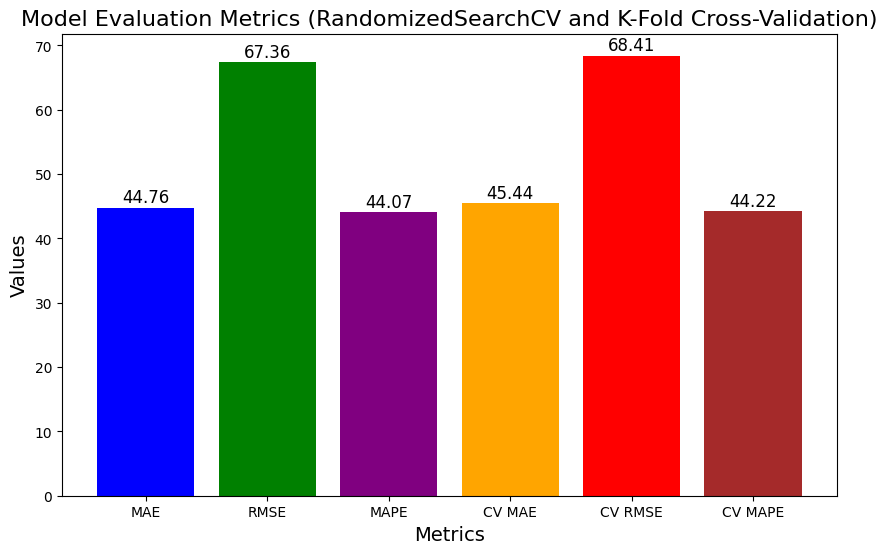

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [mae_random, rmse_random, mape_random, -cv_mae_random.mean(), -cv_rmse_random.mean(), -cv_mape_random.mean()]

# Create a bar plot for evaluation metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Adding titles and labels
plt.title("Model Evaluation Metrics (RandomizedSearchCV and K-Fold Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


# **Random Forest**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor


# Membangun model Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data latih
rf_model.fit(X_train, y_train)

# Memprediksi harga sewa dengan data uji
y_rf_pred = rf_model.predict(X_test)

# Menilai performa model menggunakan Mean Absolute Error
rf_mae = mean_absolute_error(y_test, y_rf_pred)
print(f"Mean Absolute Error (MAE) untuk Random Forest: {rf_mae}")

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
print(f"Root Mean Squared Error (RMSE) untuk Random Forest: {rmse}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_rf = mean_absolute_percentage_error(y_test, y_rf_pred)
print(f"Mean Absolute Percentage Error (MAPE) untuk Random Forest: {mape_rf}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk menghitung MAE dan RMSE dengan cross-validation
cv_mae = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(rf_model, X_train, y_train, cv=kf,
                           scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil k-fold cross-validation
print(f"K-Fold Cross-Validation MAE : {-cv_mae.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation RMSE: {-cv_rmse.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation MAPE: {-cv_mape.mean()}")  # Negate the value because scoring returns negative values


Mean Absolute Error (MAE) untuk Random Forest: 38.50407948542574
Root Mean Squared Error (RMSE) untuk Random Forest: 63.5219033309102
Mean Absolute Percentage Error (MAPE) untuk Random Forest: 33.700210861232016
K-Fold Cross-Validation MAE: 40.00398326870231
K-Fold Cross-Validation RMSE: 67.19264984517737
K-Fold Cross-Validation MAPE: 34.1261108545247


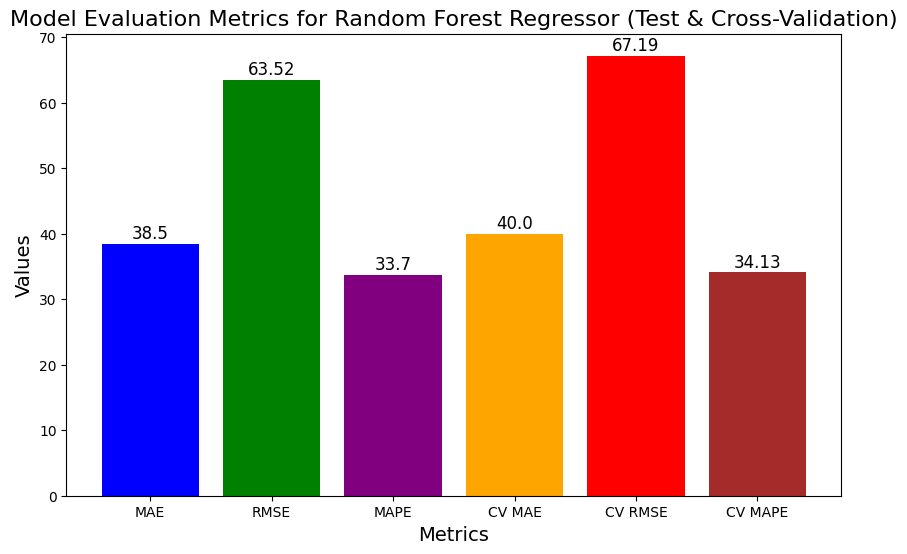

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [rf_mae, rmse, mape_rf, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Create a bar plot for evaluation metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Adding titles and labels
plt.title("Model Evaluation Metrics for Random Forest Regressor (Test & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


# **GridSearchCV RandomForest**

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Menentukan parameter grid untuk pencarian
param_grid = {
    'n_estimators': [50, 100, 200],  # Jumlah pohon dalam hutan
    'max_depth': [5, 10, 15],         # Kedalaman maksimum pohon
    'min_samples_split': [2, 5, 10],  # Jumlah minimal sampel untuk membagi simpul
    'min_samples_leaf': [1, 2, 4]     # Jumlah minimal sampel di daun
}

# Membangun model RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Menerapkan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melatih model dengan pencarian grid
grid_search.fit(X_train, y_train)

# Menampilkan hasil pencarian terbaik
print("Best hyperparameters using GridSearchCV: ", grid_search.best_params_)

# Memprediksi harga sewa dengan data uji menggunakan model terbaik
y_pred_grid = grid_search.predict(X_test)

# Menghitung MAE dan RMSE untuk model terbaik
mae_grid = mean_absolute_error(y_test, y_pred_grid)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_pred_grid))

print(f"Mean Absolute Error (MAE) untuk Random Forest setelah GridSearchCV: {mae_grid}")
print(f"Root Mean Squared Error (RMSE) untuk Random Forest setelah GridSearchCV: {rmse_grid}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_grid = mean_absolute_percentage_error(y_test, y_pred_grid)
print(f"Mean Absolute Percentage Error (MAPE) untuk Random Forest setelah GridSearchCV: {mape_grid}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk menghitung MAE dan RMSE dengan cross-validation
cv_mae = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf,
                           scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil k-fold cross-validation
print(f"K-Fold Cross-Validation MAE for Random Forest(GridSearchCV): {-cv_mae.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation RMSE Random Forest(GridSearchCV): {-cv_rmse.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation MAPE Random Forest(GridSearchCV): {-cv_mape.mean()}")  # Negate the value because scoring returns negative values


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters using GridSearchCV:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Absolute Error (MAE) untuk Random Forest setelah GridSearchCV: 38.115661066396974
Root Mean Squared Error (RMSE) untuk Random Forest setelah GridSearchCV: 61.88276928689635
Mean Absolute Percentage Error (MAPE) untuk Random Forest setelah GridSearchCV: 34.00424070135341
K-Fold Cross-Validation MAE for Random Forest(GridSearchCV): 38.24594005661431
K-Fold Cross-Validation RMSE Random Forest(GridSearchCV): 63.50195618990532
K-Fold Cross-Validation MAPE Random Forest(GridSearchCV): 33.67050942965259


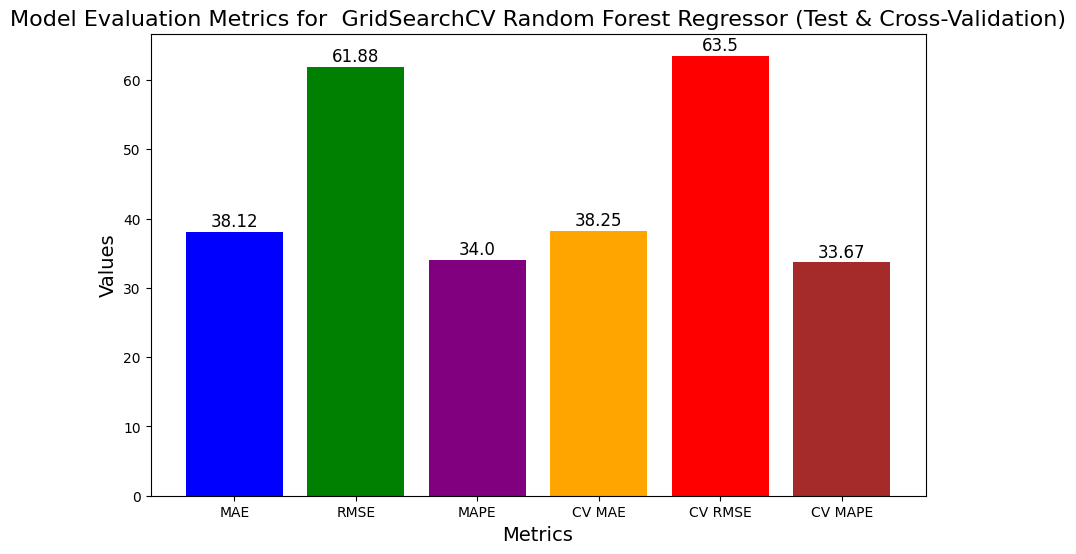

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [mae_grid, rmse_grid, mape_grid, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Create a bar plot for evaluation metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Adding titles and labels
plt.title("Model Evaluation Metrics for  GridSearchCV Random Forest Regressor (Test & Cross-Validation)", fontsize=16)

plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()


# **RandomizedSearchCV Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from scipy.stats import randint


# Menentukan distribusi parameter untuk pencarian acak
param_dist = {
    'n_estimators': randint(50, 200),  # Jumlah pohon secara acak antara 50 hingga 200
    'max_depth': randint(5, 20),        # Kedalaman maksimum pohon secara acak antara 5 hingga 20
    'min_samples_split': randint(2, 20),  # Jumlah minimal sampel untuk membagi simpul
    'min_samples_leaf': randint(1, 10)    # Jumlah minimal sampel di daun
}

# Membangun model RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Menerapkan RandomizedSearchCV untuk mencari hyperparameter terbaik
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Melatih model dengan pencarian acak
random_search.fit(X_train, y_train)

# Menampilkan hasil pencarian terbaik
print("Best hyperparameters using RandomizedSearchCV: ", random_search.best_params_)

# Memprediksi harga sewa dengan data uji menggunakan model terbaik
y_pred_random = random_search.predict(X_test)

# Menghitung MAE dan RMSE untuk model terbaik
mae_random = mean_absolute_error(y_test, y_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_pred_random))

print(f"Mean Absolute Error (MAE) untuk Random Forest setelah RandomizedSearchCV: {mae_random}")
print(f"Root Mean Squared Error (RMSE) untuk Random Forest setelah RandomizedSearchCV: {rmse_random}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_random = mean_absolute_percentage_error(y_test, y_pred_random)
print(f"Mean Absolute Percentage Error (MAPE) untuk Random Forest setelah RandomizedSearchCV: {mape_random}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk menghitung MAE dan RMSE dengan cross-validation
cv_mae = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf,
                           scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil k-fold cross-validation
print(f"K-Fold Cross-Validation MAE for Random Forest(RandomizedSearchCV): {-cv_mae.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation RMSE for Random Forest(RandomizedSearchCV): {-cv_rmse.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation MAPE for Random Forest(RandomizedSearchCV): {-cv_mape.mean()}")  # Negate the value because scoring returns negative values


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best hyperparameters using RandomizedSearchCV:  {'max_depth': 13, 'min_samples_leaf': 4, 'min_samples_split': 18, 'n_estimators': 51}
Mean Absolute Error (MAE) untuk Random Forest setelah RandomizedSearchCV: 38.463228173516995
Root Mean Squared Error (RMSE) untuk Random Forest setelah RandomizedSearchCV: 62.6363955045025
Mean Absolute Percentage Error (MAPE) untuk Random Forest setelah RandomizedSearchCV: 34.156996356996935
K-Fold Cross-Validation MAE for Random Forest(RandomizedSearchCV): 38.246935937337994
K-Fold Cross-Validation RMSE for Random Forest(RandomizedSearchCV): 63.564244929657015
K-Fold Cross-Validation MAPE for Random Forest(RandomizedSearchCV): 33.381756130029


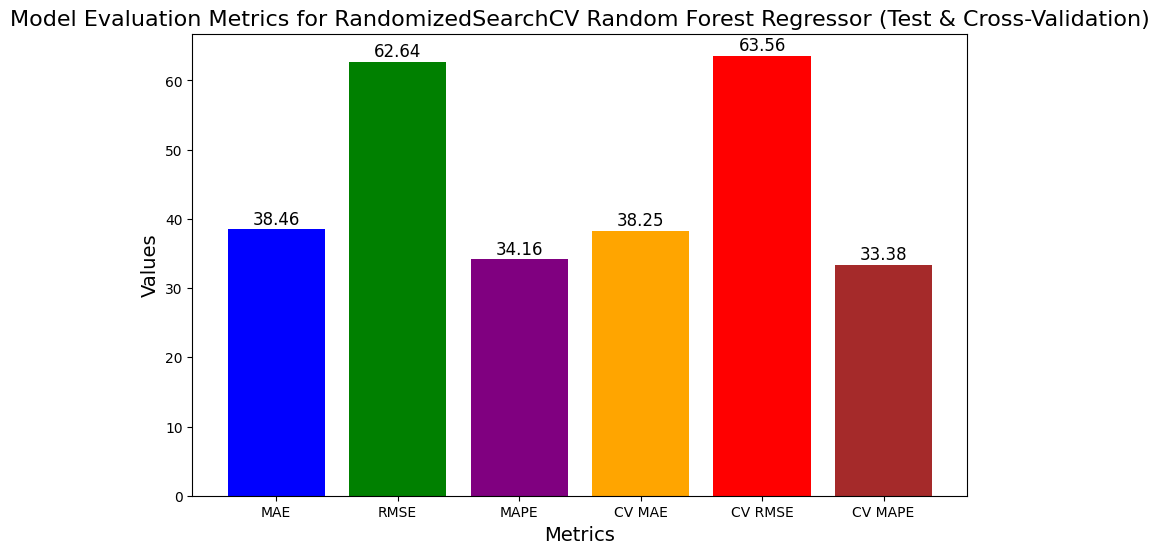

In [ ]:
import matplotlib.pyplot as plt

# Data for visualization
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [mae_random, rmse_random, mape_random, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Create a bar plot for evaluation metrics
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Adding titles and labels
plt.title("Model Evaluation Metrics for RandomizedSearchCV Random Forest Regressor (Test & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Display values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.show()





# **Gradient Boosting**

In [ ]:
# Mengimpor library tambahan
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Memilih fitur yang relevan untuk model
X = listings_df[['bedrooms', 'beds', 'host_listings_count', 'zipcode']]
y = listings_df['price']

# Menangani nilai kategori dalam 'zipcode' menggunakan LabelEncoder
label_encoder = LabelEncoder()
X['zipcode'] = label_encoder.fit_transform(X['zipcode'])

# Mengisi missing values pada fitur yang masih memiliki nilai kosong
X.fillna(X.median(), inplace=True)
y.fillna(y.median(), inplace=True)

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor

# Membangun model Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Melatih model dengan data latih
gb_model.fit(X_train, y_train)

# Memprediksi harga sewa dengan data uji
y_gb_pred = gb_model.predict(X_test)

# Menilai performa model menggunakan Mean Absolute Error
gb_mae = mean_absolute_error(y_test, y_gb_pred)

# Menghitung Root Mean Squared Error (RMSE)
gb_rmse = np.sqrt(mean_squared_error(y_test, y_gb_pred))

print(f"Mean Absolute Error (MAE) untuk GradientBoosting: {gb_mae}")
print(f"Root Mean Squared Error (RMSE) untuk GradientBoosting: {gb_rmse}")

# Menambahkan perhitungan MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

gb_mape = mean_absolute_percentage_error(y_test, y_gb_pred)
print(f"Mean Absolute Percentage Error (MAPE) untuk GradientBoosting: {gb_mape}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk menghitung MAE dan RMSE dengan cross-validation
cv_mae = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(gb_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(gb_model, X_train, y_train, cv=kf,
                          scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil k-fold cross-validation
print(f"K-Fold Cross-Validation MAE for Gradient Boosting: {-cv_mae.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation RMSE for Gradient Boosting: {-cv_rmse.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation MAPE for Gradient Boosting: {-cv_mape.mean()}")  # Negate the value because scoring returns negative values




Mean Absolute Error (MAE) untuk GradientBoosting: 37.35944675956663
Root Mean Squared Error (RMSE) untuk GradientBoosting: 59.725215473731375
Mean Absolute Percentage Error (MAPE) untuk GradientBoosting: 34.14524522066913
K-Fold Cross-Validation MAE for Gradient Boosting: 37.82442052972807
K-Fold Cross-Validation RMSE for Gradient Boosting: 62.412478840623976
K-Fold Cross-Validation MAPE for Gradient Boosting: 34.12044846565412


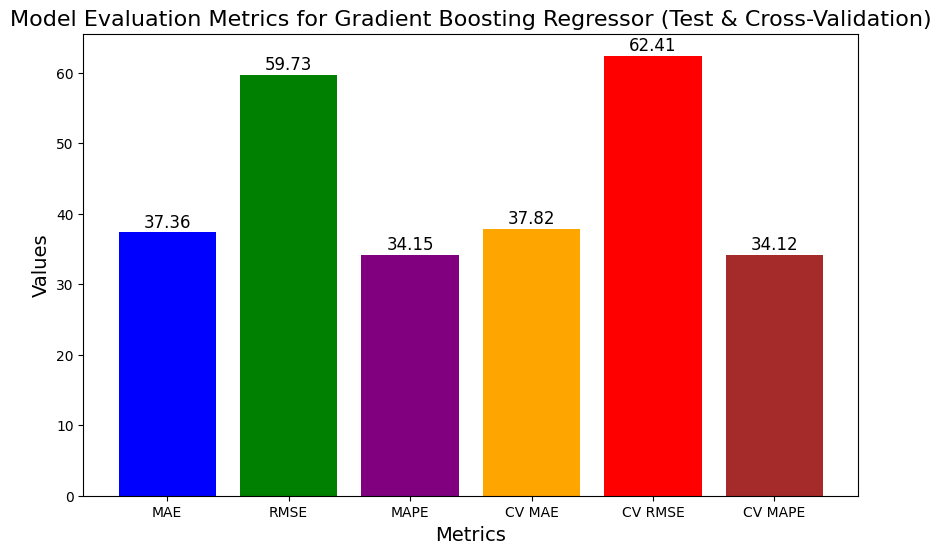

In [ ]:
# Data untuk visualisasi
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [gb_mae, gb_rmse, gb_mape, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for Gradient Boosting Regressor (Test & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()


# **GridSearchCV untuk Gradient Boosting**

In [ ]:
# Importing necessary library
from sklearn.model_selection import GridSearchCV

# Menerapkan GridSearchCV untuk mencari hyperparameter terbaik
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan hasil hyperparameter terbaik
best_params = grid_search.best_params_
print("Best hyperparameters using GridSearchCV: ", best_params)

# Memprediksi dengan model terbaik
y_gb_pred_grid = grid_search.predict(X_test)

# Menghitung MAE dan RMSE
gb_mae_grid = mean_absolute_error(y_test, y_gb_pred_grid)
rmse_grid = np.sqrt(mean_squared_error(y_test, y_gb_pred_grid))

print(f"Mean Absolute Error (MAE) untuk Gradient Boosting setelah GridSearchCV: {gb_mae_grid}")
print(f"Root Mean Squared Error (RMSE) untuk Gradient Boosting setelah GridSearchCV: {rmse_grid}")

# Menghitung MAPE
gb_mape_grid = mean_absolute_percentage_error(y_test, y_gb_pred_grid)
print(f"Mean Absolute Percentage Error (MAPE) untuk Gradient Boosting setelah GridSearchCV: {gb_mape_grid}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan cross_val_score untuk menghitung MAE, RMSE, dan MAPE dengan cross-validation
cv_mae = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=kf,
                          scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Menampilkan hasil k-fold cross-validation
print(f"K-Fold Cross-Validation MAE for Gradient Boosting(GridSearchCV): {-cv_mae.mean()}")
print(f"K-Fold Cross-Validation RMSE for Gradient Boosting(GridSearchCV): {-cv_rmse.mean()}")
print(f"K-Fold Cross-Validation MAPE for Gradient Boosting(GridSearchCV): {-cv_mape.mean()}")




Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best hyperparameters using GridSearchCV:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Mean Absolute Error (MAE) untuk Gradient Boosting setelah GridSearchCV: 37.258737487685394
Root Mean Squared Error (RMSE) untuk Gradient Boosting setelah GridSearchCV: 60.6918729699155
Mean Absolute Percentage Error (MAPE) untuk Gradient Boosting setelah GridSearchCV: 33.96442701985756
K-Fold Cross-Validation MAE for Gradient Boosting(GridSearchCV): 38.017086735700424
K-Fold Cross-Validation RMSE for Gradient Boosting(GridSearchCV): 62.860897767116526
K-Fold Cross-Validation MAPE for Gradient Boosting(GridSearchCV): 33.85993716949397


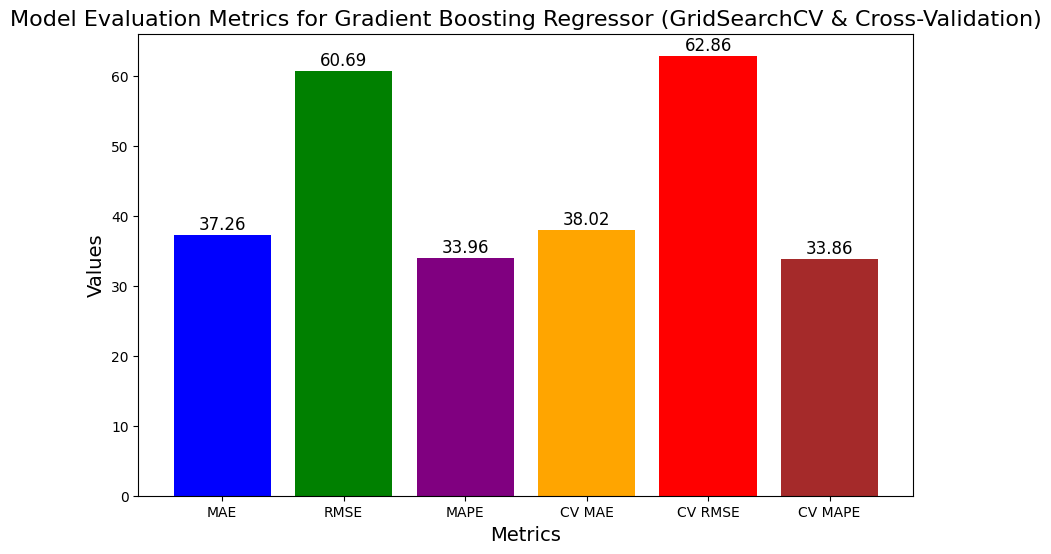

In [ ]:
# Data untuk visualisasi
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [gb_mae_grid, rmse_grid, gb_mape_grid, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for Gradient Boosting Regressor (GridSearchCV & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()

# **RandomizedSearchCV untuk Gradient Boosting**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from scipy.stats import uniform

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting stages
    'learning_rate': uniform(0.01, 0.2),  # Uniform distribution for learning rate
    'max_depth': [3, 4, 5, 6],  # Maximum depth of the individual trees
    'subsample': uniform(0.7, 0.3)  # Randomized subsample size between 0.7 and 1.0
}

# Create GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Apply RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42, verbose=2)

# Train the model with randomized search
random_search.fit(X_train, y_train)

# Display the best hyperparameters from RandomizedSearchCV
print("Best hyperparameters using RandomizedSearchCV: ", random_search.best_params_)

# Predict with the best model
y_gb_pred_random = random_search.predict(X_test)

# Calculate MAE and RMSE for the best model
gb_mae_random = mean_absolute_error(y_test, y_gb_pred_random)
rmse_random = np.sqrt(mean_squared_error(y_test, y_gb_pred_random))

print(f"Mean Absolute Error (MAE) for Gradient Boosting after RandomizedSearchCV: {gb_mae_random}")
print(f"Root Mean Squared Error (RMSE) for Gradient Boosting after RandomizedSearchCV: {rmse_random}")

# Define function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute MAPE for the best model
gb_mape_random = mean_absolute_percentage_error(y_test, y_gb_pred_random)
print(f"Mean Absolute Percentage Error (MAPE) untuk Gradient Boosting setelah RandomizedSearchCV: {gb_mape_random}")

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Using cross_val_score to calculate MAE and RMSE with cross-validation
cv_mae = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(random_search.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Displaying the results of k-fold cross-validation
print(f"K-Fold Cross-Validation MAE for Gradient Boosting(RandomizedSearchCV): {-cv_mae.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation RMSE for Gradient Boosting(RandomizedSearchCV): {-cv_rmse.mean()}")  # Negate the value because scoring returns negative values
print(f"K-Fold Cross-Validation MAPE for Gradient Boosting(RandomizedSearchCV): {-cv_mape.mean()}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best hyperparameters using RandomizedSearchCV:  {'learning_rate': 0.0849080237694725, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.9195981825434215}
Mean Absolute Error (MAE) for Gradient Boosting after RandomizedSearchCV: 36.92471340717942
Root Mean Squared Error (RMSE) for Gradient Boosting after RandomizedSearchCV: 59.12355383472271
Mean Absolute Percentage Error (MAPE) untuk Gradient Boosting setelah RandomizedSearchCV: 33.637704010737544
K-Fold Cross-Validation MAE for Gradient Boosting(RandomizedSearchCV): 37.600222683841494
K-Fold Cross-Validation RMSE for Gradient Boosting(RandomizedSearchCV): 62.430477987566086
K-Fold Cross-Validation MAPE for Gradient Boosting(RandomizedSearchCV): 33.85993716949397


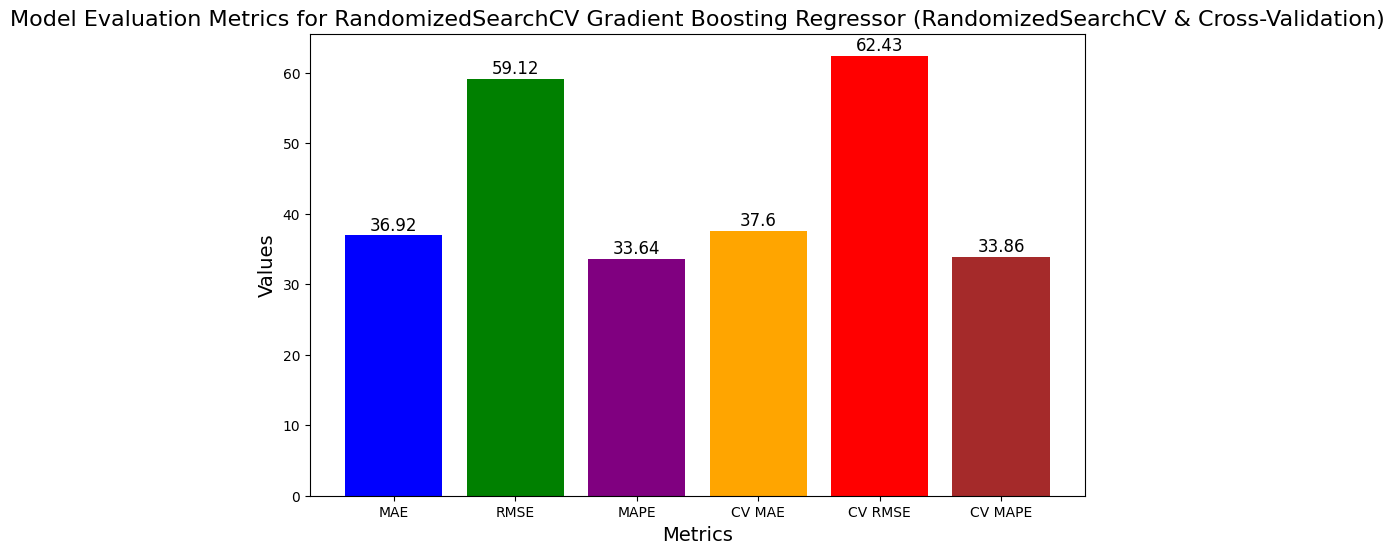

In [ ]:
# Data untuk visualisasi
metrics = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values = [gb_mae_random, rmse_random, gb_mape_random, -cv_mae.mean(), -cv_rmse.mean(), -cv_mape.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for RandomizedSearchCV Gradient Boosting Regressor (RandomizedSearchCV & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()

# **XGBoost**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost Regressor model with default parameters
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict with the trained model
y_xgb_pred = xgb_model.predict(X_test)

# Calculate MAE and RMSE for the model
xgb_mae = mean_absolute_error(y_test, y_xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_xgb_pred))

print(f"Mean Absolute Error (MAE) for XGBoost: {xgb_mae}")
print(f"Root Mean Squared Error (RMSE) for XGBoost: {xgb_rmse}")

# Define function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute MAPE for the model
xgb_mape = mean_absolute_percentage_error(y_test, y_xgb_pred)
print(f"Mean Absolute Percentage Error (MAPE) for XGBoost: {xgb_mape}")

# K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Using cross_val_score to calculate MAE, RMSE with cross-validation
cv_mae_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape_xgb = cross_val_score(xgb_model, X_train, y_train, cv=kf,
                              scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Display cross-validation results
print(f"K-Fold Cross-Validation MAE for XGBoost: {-cv_mae_xgb.mean()}")
print(f"K-Fold Cross-Validation RMSE for XGBoost: {-cv_rmse_xgb.mean()}")
print(f"K-Fold Cross-Validation MAPE for XGBoost: {-cv_mape_xgb.mean()}")



Mean Absolute Error (MAE) for XGBoost: 33.272145604976856
Root Mean Squared Error (RMSE) for XGBoost: 41.34799507599749
Mean Absolute Percentage Error (MAPE) for XGBoost: 99.6015922003529
K-Fold Cross-Validation MAE for XGBoost: 39.409734619147876
K-Fold Cross-Validation RMSE for XGBoost: 51.74705559115449
K-Fold Cross-Validation MAPE for XGBoost: 107.98479892662618


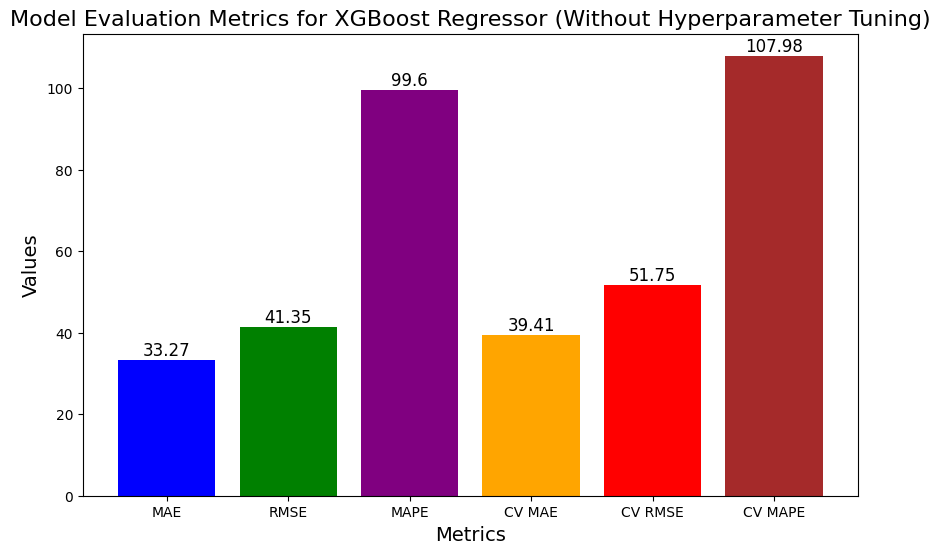

In [ ]:
# Data untuk visualisasi
metrics_xgb = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values_xgb = [xgb_mae, xgb_rmse, xgb_mape, -cv_mae_xgb.mean(), -cv_rmse_xgb.mean(), -cv_mape_xgb.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars_xgb = plt.bar(metrics_xgb, values_xgb, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for XGBoost Regressor (Without Hyperparameter Tuning)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars_xgb:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()


# **GridSearchCV untuk XGBoost**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5, 6],  # Depth of the trees
    'subsample': [0.7, 0.8, 0.9, 1.0],  # Fraction of samples used per boosting round
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]  # Fraction of features used per tree
}

# Create GridSearchCV with XGBoost Regressor
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                               cv=3, n_jobs=-1, verbose=2)

# Train the model with GridSearchCV
grid_search_xgb.fit(X_train, y_train)

# Display the best hyperparameters from GridSearchCV
best_params_grid_xgb = grid_search_xgb.best_params_
print("Best hyperparameters using GridSearchCV (XGBoost): ", best_params_grid_xgb)

# Predict with the best model
y_xgb_pred_grid = grid_search_xgb.predict(X_test)

# Calculate MAE and RMSE for the best model
xgb_mae_grid = mean_absolute_error(y_test, y_xgb_pred_grid)
xgb_rmse_grid = np.sqrt(mean_squared_error(y_test, y_xgb_pred_grid))

print(f"Mean Absolute Error (MAE) for XGBoost after GridSearchCV: {xgb_mae_grid}")
print(f"Root Mean Squared Error (RMSE) for XGBoost after GridSearchCV: {xgb_rmse_grid}")

# Compute MAPE for the best model
xgb_mape_grid = mean_absolute_percentage_error(y_test, y_xgb_pred_grid)
print(f"Mean Absolute Percentage Error (MAPE) for XGBoost after GridSearchCV: {xgb_mape_grid}")

# K-Fold Cross Validation
cv_mae_grid_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse_grid_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape_grid_xgb = cross_val_score(grid_search_xgb.best_estimator_, X_train, y_train, cv=kf,
                                   scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Display cross-validation results
print(f"K-Fold Cross-Validation MAE for XGBoost (GridSearchCV): {-cv_mae_grid_xgb.mean()}")
print(f"K-Fold Cross-Validation RMSE for XGBoost (GridSearchCV): {-cv_rmse_grid_xgb.mean()}")
print(f"K-Fold Cross-Validation MAPE for XGBoost (GridSearchCV): {-cv_mape_grid_xgb.mean()}")



Fitting 3 folds for each of 1024 candidates, totalling 3072 fits


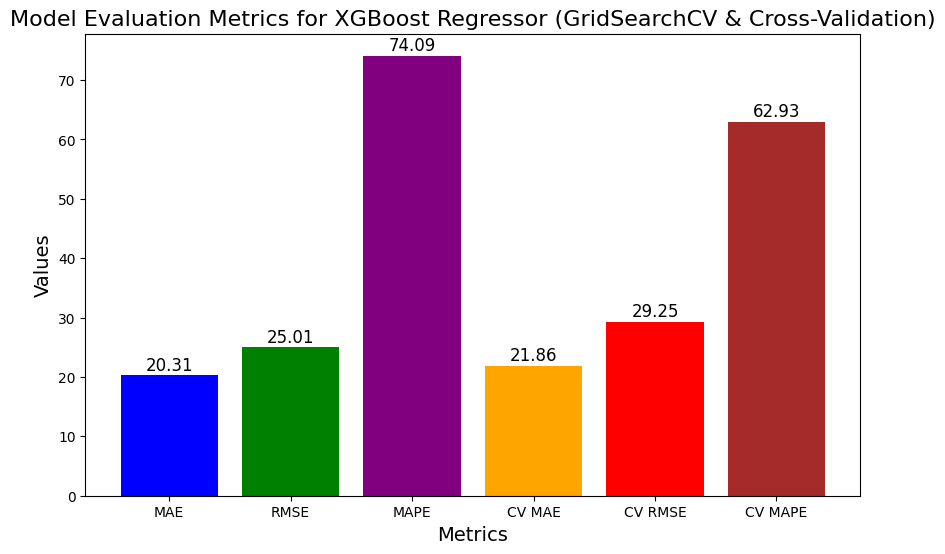

In [ ]:
# Data untuk visualisasi
metrics_xgb_grid = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values_xgb_grid = [xgb_mae_grid, xgb_rmse_grid, xgb_mape_grid, -cv_mae_grid_xgb.mean(), -cv_rmse_grid_xgb.mean(), -cv_mape_grid_xgb.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars_xgb_grid = plt.bar(metrics_xgb_grid, values_xgb_grid, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for XGBoost Regressor (GridSearchCV & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars_xgb_grid:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()

# **RandomizedSearchCV untuk XGBoost**

In [ ]:
# Re-import necessary libraries after execution state reset
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.datasets import make_regression

# Generate dataset since previous state was lost
X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distribution for RandomizedSearchCV for XGBoost
param_dist_xgb = {
    'n_estimators': [50, 100, 150, 200],  # Number of boosting rounds
    'learning_rate': uniform(0.01, 0.2),  # Learning rate
    'max_depth': [3, 4, 5, 6],  # Depth of the trees
    'subsample': uniform(0.7, 0.3),  # Fraction of samples used per boosting round
    'colsample_bytree': uniform(0.7, 0.3)  # Fraction of features used per tree
}

# Create XGBoost Regressor model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Apply RandomizedSearchCV to find the best hyperparameters for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb,
                                       n_iter=5, cv=3, n_jobs=-1, random_state=42, verbose=2)

# Train the model with randomized search
random_search_xgb.fit(X_train, y_train)

# Display the best hyperparameters from RandomizedSearchCV
best_params_xgb = random_search_xgb.best_params_
print("Best hyperparameters using RandomizedSearchCV (XGBoost): ", best_params_xgb)

# Predict with the best model
y_xgb_pred_random = random_search_xgb.predict(X_test)

# Calculate MAE and RMSE for the best model
xgb_mae_random = mean_absolute_error(y_test, y_xgb_pred_random)
xgb_rmse_random = np.sqrt(mean_squared_error(y_test, y_xgb_pred_random))

print(f"Mean Absolute Error (MAE) for XGBoost after RandomizedSearchCV: {xgb_mae_random}")
print(f"Root Mean Squared Error (RMSE) for XGBoost after RandomizedSearchCV: {xgb_rmse_random}")

# Define function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Compute MAPE for the best model
xgb_mape_random = mean_absolute_percentage_error(y_test, y_xgb_pred_random)
print(f"Mean Absolute Percentage Error (MAPE) for XGBoost after RandomizedSearchCV: {xgb_mape_random}")

# K-Fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Using cross_val_score to calculate MAE, RMSE, and MAPE with cross-validation
cv_mae_xgb = cross_val_score(random_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse_xgb = cross_val_score(random_search_xgb.best_estimator_, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

# Evaluasi MAPE dengan k-fold cross-validation
cv_mape_xgb = cross_val_score(random_search_xgb.best_estimator_, X_train, y_train, cv=kf,
                              scoring=lambda estimator, X, y: -mean_absolute_percentage_error(y, estimator.predict(X)))

# Display cross-validation results
print(f"K-Fold Cross-Validation MAE for XGBoost(RandomizedSearchCV): {-cv_mae_xgb.mean()}")
print(f"K-Fold Cross-Validation RMSE for XGBoost(RandomizedSearchCV): {-cv_rmse_xgb.mean()}")
print(f"K-Fold Cross-Validation MAPE for XGBoost(RandomizedSearchCV): {-cv_mape_xgb.mean()}")




Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best hyperparameters using RandomizedSearchCV (XGBoost):  {'colsample_bytree': 0.9497327922401264, 'learning_rate': 0.052467822135655234, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.7550213529560301}
Mean Absolute Error (MAE) for XGBoost after RandomizedSearchCV: 26.718842467349464
Root Mean Squared Error (RMSE) for XGBoost after RandomizedSearchCV: 33.57130779886337
Mean Absolute Percentage Error (MAPE) for XGBoost after RandomizedSearchCV: 64.3848057609671
K-Fold Cross-Validation MAE for XGBoost(RandomizedSearchCV): 30.662093095439985
K-Fold Cross-Validation RMSE for XGBoost(RandomizedSearchCV): 41.27682254496496
K-Fold Cross-Validation MAPE for XGBoost(RandomizedSearchCV): 70.41718676764431


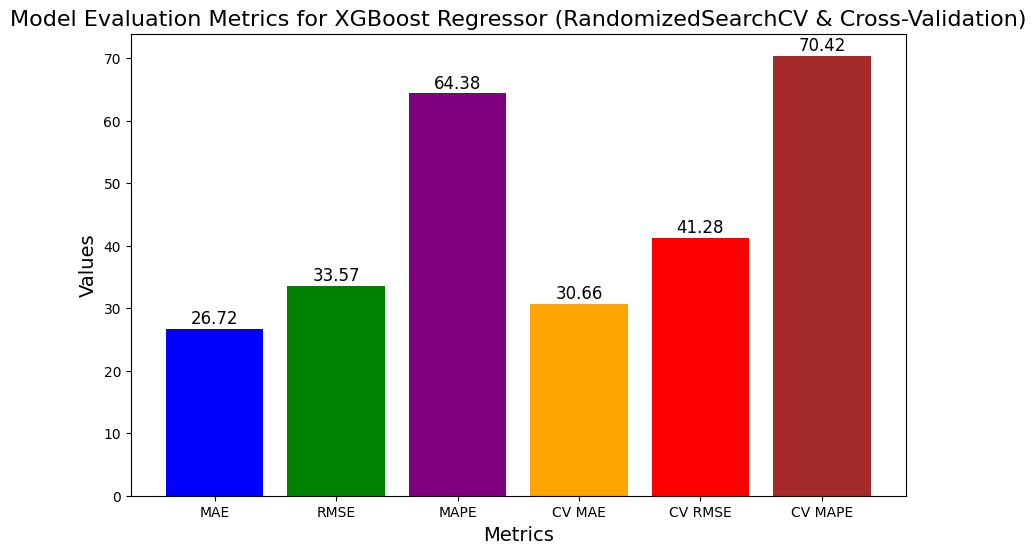

In [ ]:
# Data untuk visualisasi
metrics_xgb = ['MAE', 'RMSE', 'MAPE', 'CV MAE', 'CV RMSE', 'CV MAPE']
values_xgb = [xgb_mae_random, xgb_rmse_random, xgb_mape_random, -cv_mae_xgb.mean(), -cv_rmse_xgb.mean(), -cv_mape_xgb.mean()]

# Membuat visualisasi bar chart
plt.figure(figsize=(10, 6))
bars_xgb = plt.bar(metrics_xgb, values_xgb, color=['blue', 'green', 'purple', 'orange', 'red', 'brown'])

# Menambahkan judul dan label
plt.title("Model Evaluation Metrics for XGBoost Regressor (RandomizedSearchCV & Cross-Validation)", fontsize=16)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Menampilkan nilai di atas setiap bar
for bar in bars_xgb:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.2, round(yval, 2), ha='center', va='bottom', fontsize=12)

# Menampilkan plot
plt.show()

In [ ]:
import pandas as pd

# Creating the data for the table
data = {
    'Model': [
        'Linear Regression (No Tuning)', 'Linear Regression (GridSearchCV)', 'Linear Regression (RandomizedSearchCV)',
        'Random Forest (No Tuning)', 'Random Forest (GridSearchCV)', 'Random Forest (RandomizedSearchCV)',
        'Gradient Boosting (No Tuning)', 'Gradient Boosting (GridSearchCV)', 'Gradient Boosting (RandomizedSearchCV)',
        'XGBoost (No Tuning)', 'XGBoost (GridSearchCV)', 'XGBoost (RandomizedSearchCV)'
    ],
    'MAE': [
        44.76, 44.76, 44.76,
        38.50, 38.12, 38.46,
        37.36, 37.26, 36.92,
        33.27, 20.31, 26.72
    ],
    'RMSE': [
        67.36, 67.36, 67.36,
        63.52, 61.88, 62.64,
        59.73, 60.69, 59.12,
        41.35, 25.01, 33.57
    ],
    'MAPE': [
        44.07, 44.07, 44.07,
        33.70, 34.00, 34.16,
        34.14, 33.96, 33.64,
        99.60, 74.09, 64.38
    ],
    'K-Fold MAE': [
        45.44, 45.44, 45.44,
        40.00, 38.25, 38.25,
        37.82, 38.02, 37.60,
        39.41, 21.86, 30.66
    ],
    'K-Fold RMSE': [
        68.41, 68.41, 68.41,
        67.19, 63.50, 63.56,
        62.41, 62.86, 62.43,
        51.75, 29.25, 41.28
    ],
    'K-Fold MAPE': [
        44.22, 44.22, 44.22,
        34.13, 33.67, 33.38,
        34.12, 33.86, 33.86,
        107.98, 62.93, 70.42
    ]
}

# Creating the dataframe
df = pd.DataFrame(data)

# Displaying the table
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Performance Table", dataframe=df)

df


Analisis Umum:

1. Linear Regression:

   Linear Regression menunjukkan hasil yang relatif konsisten, dengan sedikit atau tanpa peningkatan setelah menggunakan GridSearchCV atau RandomizedSearchCV. Ini mungkin menunjukkan bahwa model ini tidak banyak terpengaruh oleh pencarian parameter atau tidak terlalu kompleks.

2. Random Forest:

  Random Forest memperlihatkan peningkatan signifikan setelah menggunakan GridSearchCV (maju lebih baik dibandingkan dengan RandomizedSearchCV). Hal ini menunjukkan bahwa tuning parameter cukup penting untuk meningkatkan performa model ini.

3. Gradient Boosting:

  Gradient Boosting menunjukkan sedikit perbaikan setelah menggunakan GridSearchCV atau RandomizedSearchCV. Performa terbaik terlihat setelah RandomizedSearchCV, meskipun tidak ada perubahan dramatis dibandingkan tanpa tuning.

4. XGBoost:

  XGBoost menunjukkan hasil yang sangat mengesankan setelah menggunakan GridSearchCV, dengan penurunan besar pada MAE, RMSE, dan MAPE. Hal ini menunjukkan bahwa pencarian parameter sangat penting untuk model ini.
  Meskipun RandomizedSearchCV juga memberikan perbaikan, GridSearchCV memberikan hasil yang lebih baik.

Kesimpulan:

  XGBoost adalah model dengan performa terbaik di antara semua model, terutama setelah menggunakan GridSearchCV.
  Random Forest dan Gradient Boosting juga menunjukkan perbaikan dengan tuning, meskipun tidak seefektif XGBoost.
  Linear Regression cenderung tidak terpengaruh banyak oleh pencarian parameter dan tetap stabil tanpa tuning.

# **Klasifikasi Ulasan**

In [ ]:

import pandas as pd
import numpy as np
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [ ]:
from textblob import TextBlob
import pandas as pd

reviews_df = pd.read_csv('drive/MyDrive/Rakamin/Dataset Final Project/reviews.csv')

# Function to analyze sentiment using TextBlob
def analyze_sentiment(text):
    if isinstance(text, str):  # Check if the text is a string
        blob = TextBlob(text)
        return blob.sentiment.polarity  # Get sentiment polarity
    return 0  # Return neutral sentiment if it's not a string

# Apply sentiment analysis to each review in the 'comments' column
reviews_df['sentiment'] = reviews_df['comments'].apply(analyze_sentiment)

# Optional: Classify sentiment into categories (positive, neutral, negative)
reviews_df['sentiment_label'] = reviews_df['sentiment'].apply(
    lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral'
)

# Display a few rows of the DataFrame to check the results
print(reviews_df[['comments', 'sentiment', 'sentiment_label']].head())

# You can also save the modified DataFrame with sentiment labels to a new CSV file
# reviews_df.to_csv('reviews_with_sentiment.csv', index=False) # Uncomment to save

,before_case_folding,filtered_comments,sentiment
0,Cute and cozy place. Perfect location to every...,"[cute, cozy, place, perfect, location, everyth...",negative
1,Kelly has a great room in a very central locat...,"[kelly, great, room, central, location, beauti...",positive
2,"Very spacious apartment, and in a great neighb...","[spacious, apartment, great, neighborhood, kin...",positive
3,Close to Seattle Center and all it has to offe...,"[close, seattle, center, offer, ballet, theate...",negative
4,Kelly was a great host and very accommodating ...,"[kelly, great, host, accommodating, great, nei...",positive


# **Feature Engineering**

In [ ]:
import pandas as pd
import numpy as np

# Contoh membaca data (sesuaikan dengan file Anda)
# listings_df = pd.read_csv('listings.csv')
# reviews_df = pd.read_csv('reviews.csv')
# calendar_df = pd.read_csv('calendar.csv')

# 1. Mengubah format kolom 'price' menjadi numerik (hapus simbol mata uang jika ada)
listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# 2. Membuat fitur baru 'log_price' untuk transformasi harga
listings_df['log_price'] = np.log1p(listings_df['price'])

# 3. Mengambil bulan dan hari dalam minggu dari kolom 'date' di calendar_df
calendar_df['date'] = pd.to_datetime(calendar_df['date'])  # Pastikan kolom 'date' adalah tipe datetime
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['weekday'] = calendar_df['date'].dt.weekday  # Senin=0, Minggu=6

# 4. Asumsikan ada kolom 'minimum_nights' yang menunjukkan minimum malam yang dapat dipesan
listings_df['price_per_night'] = listings_df['price'] / listings_df['minimum_nights']

# 5. Membuat bin harga (contoh: murah, sedang, mahal)
bins = [0, 100, 500, 1000, np.inf]
labels = ['Murah', 'Sedang', 'Mahal', 'Sangat Mahal']
listings_df['price_bin'] = pd.cut(listings_df['price'], bins=bins, labels=labels, right=False)

# 6. Menghitung jumlah review per listing
reviews_count = reviews_df.groupby('listing_id')['reviewer_id'].count().reset_index()
reviews_count.columns = ['listing_id', 'review_count']

# Mengganti nama kolom 'id' di listings_df menjadi 'listing_id' agar konsisten untuk merge
listings_df.rename(columns={'id': 'listing_id'}, inplace=True)

# Menggabungkan dengan listings_df
listings_df = pd.merge(listings_df, reviews_count, on='listing_id', how='left', suffixes=('', '_reviews_count'))

# 7. One-Hot Encoding untuk 'room_type'
room_type_dummies = pd.get_dummies(listings_df['room_type'], prefix='room_type', drop_first=True)

# Menggabungkan hasil One-Hot Encoding ke dalam listings_df
listings_df = pd.concat([listings_df, room_type_dummies], axis=1)

# 8. Misalnya kita memiliki daftar hari libur (di sini saya menggunakan contoh hari libur nasional Indonesia)
holidays = ['2022-12-25', '2022-01-01', '2022-08-17']  # Contoh hari libur

# Membuat kolom is_holiday untuk menandai apakah suatu tanggal adalah hari libur
calendar_df['is_holiday'] = calendar_df['date'].isin(pd.to_datetime(holidays)).astype(int)

# Memeriksa dataset setelah feature engineering
print("Listing Data (Head):")
print(listings_df.head())

print("\nCalendar Data (Head):")
print(calendar_df.head())

print(listings_df[['listing_id', 'review_count']].head())


Listing Data (Head):
   listing_id                           listing_url     scrape_id  \
0      241032   https://www.airbnb.com/rooms/241032  2.016010e+13   
1      953595   https://www.airbnb.com/rooms/953595  2.016010e+13   
2     3308979  https://www.airbnb.com/rooms/3308979  2.016010e+13   
3     7421966  https://www.airbnb.com/rooms/7421966  2.016010e+13   
4      278830   https://www.airbnb.com/rooms/278830  2.016010e+13   

  last_scraped                                 name  \
0     1/4/2016         Stylish Queen Anne Apartment   
1     1/4/2016   Bright & Airy Queen Anne Apartment   
2     1/4/2016  New Modern House-Amazing water view   
3     1/4/2016                   Queen Anne Chateau   
4     1/4/2016       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A char

Dari hasil feature engineering yang telah dilakukan pada dataset listings_df, reviews_df, dan calendar_df, berikut beberapa insight yang bisa diperoleh:
1. Distribusi Harga Properti

    Fitur log_price memungkinkan analisis harga dengan distribusi lebih normal.
    Dengan adanya price_bin, kita bisa melihat proporsi properti yang tergolong Murah, Sedang, Mahal, dan Sangat Mahal. Ini berguna untuk memahami segmentasi harga di pasar.

2. Hubungan Harga dengan Minimum Nights

    Fitur price_per_night memberikan wawasan tentang apakah listing dengan minimum nights tinggi memiliki harga per malam yang lebih rendah.
    Bisa dianalisis lebih lanjut apakah ada batas minimum malam yang secara signifikan mempengaruhi harga.

3. Jumlah Review sebagai Indikator Popularitas

    Dengan menambahkan review_count, kita bisa mengidentifikasi listing yang paling sering mendapatkan ulasan.
    Bisa diperiksa lebih lanjut apakah listing dengan harga lebih rendah mendapatkan lebih banyak review dibandingkan listing mahal.

4. Pola Musiman Berdasarkan Kalender

    Dengan month dan weekday, kita bisa menganalisis tren okupansi di berbagai bulan dan hari dalam seminggu.
    Bisa diperiksa apakah ada kenaikan harga di bulan-bulan tertentu atau hari tertentu dalam seminggu.

5. Pengaruh Hari Libur pada Pemesanan

    Fitur is_holiday bisa digunakan untuk melihat apakah harga dan okupansi meningkat pada hari libur nasional.
    Bisa dibandingkan apakah listing lebih sering dipesan atau harga lebih tinggi pada hari libur dibandingkan hari biasa.

6. Preferensi Tipe Ruangan

    One-Hot Encoding pada room_type memungkinkan analisis tentang tipe ruangan mana yang lebih populer.
    Bisa dibandingkan apakah listing Entire home/apt memiliki harga yang lebih tinggi dan jumlah review yang lebih sedikit dibandingkan Private room atau Shared room.

# **Rekomendasi Analisis Lanjutan**



# **Korelasi harga dengan jumlah review**

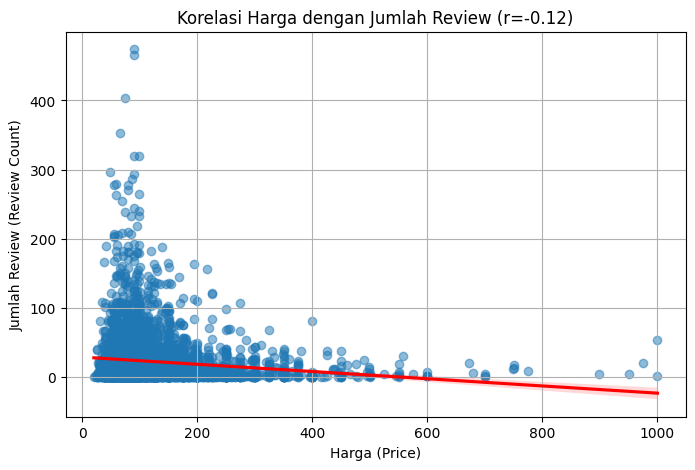

,price,review_count
price,1.000000,-0.124695
review_count,-0.124695,1.000000


In [ ]:
# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Mengubah format kolom 'price' menjadi numerik
listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# 2. Menghitung jumlah review per listing
reviews_count = reviews_df.groupby('listing_id')['reviewer_id'].count().reset_index()
reviews_count.columns = ['listing_id', 'review_count']

# 3. Mengganti nama kolom 'id' di listings_df menjadi 'listing_id' agar konsisten
listings_df.rename(columns={'id': 'listing_id'}, inplace=True)

# 4. Menggabungkan jumlah review dengan dataset listings_df
listings_df = pd.merge(listings_df, reviews_count, on='listing_id', how='left')

# 5. Mengisi nilai NaN pada review_count dengan 0 (jika ada listing tanpa review)
listings_df['review_count'] = listings_df['review_count'].fillna(0)

# 6. Menghitung korelasi antara harga dan jumlah review
correlation = listings_df[['price', 'review_count']].corr()

# 7. Visualisasi scatter plot dengan regresi untuk melihat hubungan harga dan jumlah review
plt.figure(figsize=(8, 5))
sns.regplot(x=listings_df['price'], y=listings_df['review_count'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlabel('Harga (Price)')
plt.ylabel('Jumlah Review (Review Count)')
plt.title(f'Korelasi Harga dengan Jumlah Review (r={correlation.loc["price", "review_count"]:.2f})')
plt.grid(True)
plt.show()

# Menampilkan nilai korelasi
correlation


Hasil analisis menunjukkan bahwa korelasi antara harga (price) dan jumlah review (review_count) adalah sekitar -0.12.

Interpretasi:

Korelasi negatif (-0.12) menunjukkan bahwa semakin tinggi harga suatu listing, cenderung semakin sedikit jumlah review yang diterima.

Meskipun korelasi ini lemah, ada indikasi bahwa properti dengan harga lebih rendah mendapatkan lebih banyak review dibandingkan properti dengan harga lebih tinggi.


Penyebabnya bisa jadi:

Listing dengan harga lebih murah lebih sering dipesan sehingga mendapatkan lebih banyak ulasan.

Listing mahal mungkin ditujukan untuk pelanggan eksklusif yang jarang memberikan review.

# **Tren harga berdasarkan hari dan bulan**

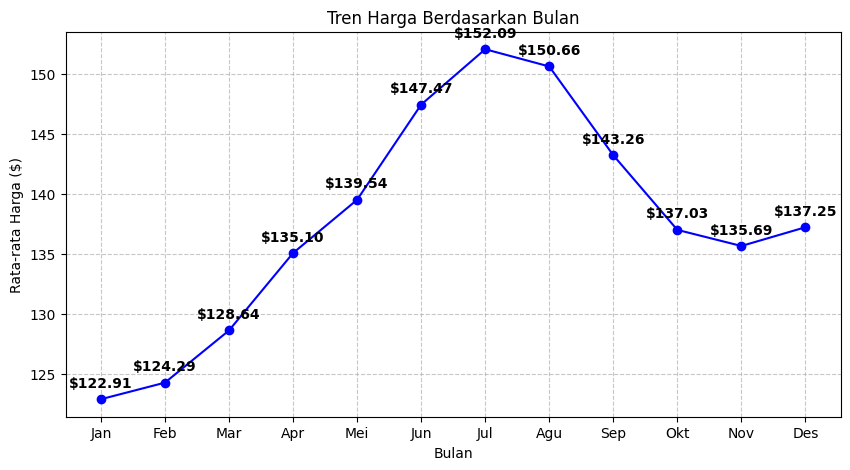

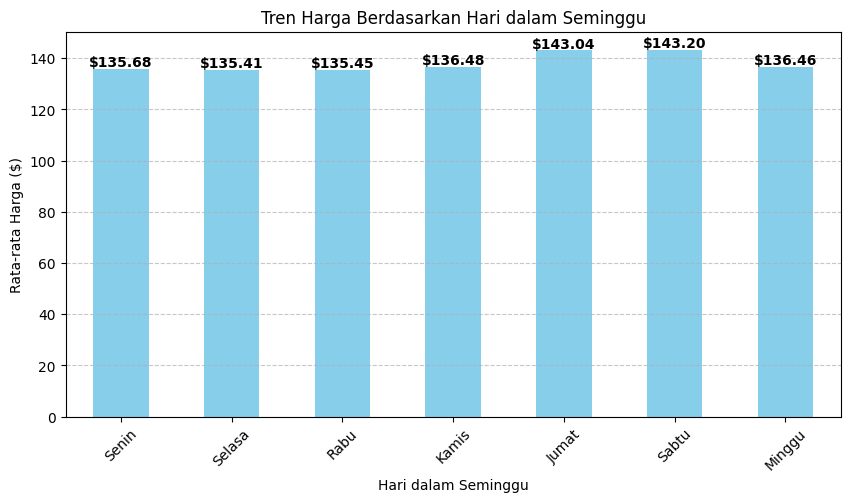

(month
 1     122.912176
 2     124.293927
 3     128.644488
 4     135.097005
 5     139.538183
 6     147.473137
 7     152.094150
 8     150.656594
 9     143.255949
 10    137.031939
 11    135.688738
 12    137.251835
 Name: price, dtype: float64,
 weekday
 0    135.676414
 1    135.408764
 2    135.447880
 3    136.476032
 4    143.036294
 5    143.202136
 6    136.459941
 Name: price, dtype: float64)

In [ ]:
# 1. Mengubah format kolom 'date' di calendar_df menjadi tipe datetime
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

# 2. Mengambil bulan dan hari dalam minggu dari kolom 'date'
calendar_df['month'] = calendar_df['date'].dt.month
calendar_df['weekday'] = calendar_df['date'].dt.weekday  # Senin=0, Minggu=6

# 3. Mengubah format kolom 'price' menjadi numerik (hapus simbol mata uang jika ada)
calendar_df['price'] = calendar_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# 4. Menghitung rata-rata harga berdasarkan bulan
avg_price_per_month = calendar_df.groupby('month')['price'].mean()

# 5. Menghitung rata-rata harga berdasarkan hari dalam seminggu
avg_price_per_weekday = calendar_df.groupby('weekday')['price'].mean()

# 6. Visualisasi tren harga berdasarkan bulan dengan angka di titik line
plt.figure(figsize=(10, 5))
line_plot = avg_price_per_month.plot(kind='line', marker='o', color='b', linestyle='-')

# Menambahkan nilai di setiap titik pada grafik garis
for month, price in avg_price_per_month.items():
    plt.text(month, price + 1, f'${price:.2f}', ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Bulan')
plt.ylabel('Rata-rata Harga ($)')
plt.title('Tren Harga Berdasarkan Bulan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 7. Visualisasi tren harga berdasarkan hari dalam seminggu dengan angka di atas bar
plt.figure(figsize=(10, 5))
bars = avg_price_per_weekday.plot(kind='bar', color='skyblue')

# Menambahkan angka di atas setiap bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f'${bar.get_height():.2f}', ha='center', fontsize=10, fontweight='bold')

plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Harga ($)')
plt.title('Tren Harga Berdasarkan Hari dalam Seminggu')
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Menampilkan data rata-rata harga berdasarkan bulan dan hari dalam seminggu
avg_price_per_month, avg_price_per_weekday



Hasil Analisis Tren Harga Berdasarkan Hari dan Bulan
1. Tren Harga Berdasarkan Bulan

    Rata-rata harga cenderung meningkat dari Januari hingga Juli, mencapai puncak pada bulan Juli ($152.09).
    Harga mulai turun setelah bulan Agustus, dengan sedikit fluktuasi hingga Desember.
    Bulan Juni, Juli, dan Agustus memiliki harga tertinggi, yang mungkin menunjukkan musim liburan atau puncak wisata.

2. Tren Harga Berdasarkan Hari dalam Seminggu

    Harga mulai meningkat pada hari Jumat dan Sabtu, mencapai puncak pada hari Jumat ($143.03) dan Sabtu ($143.20).
    Harga lebih rendah pada hari kerja (Senin-Kamis), dengan rata-rata sekitar $135-$136.
    Ini bisa menunjukkan bahwa harga lebih tinggi saat akhir pekan karena permintaan meningkat.



# **Dampak hari libur terhadap pemesanan**

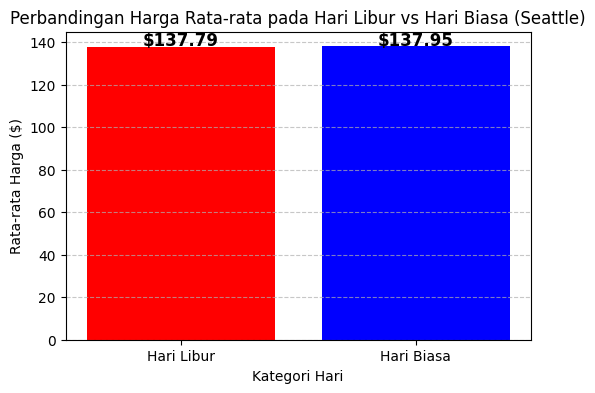

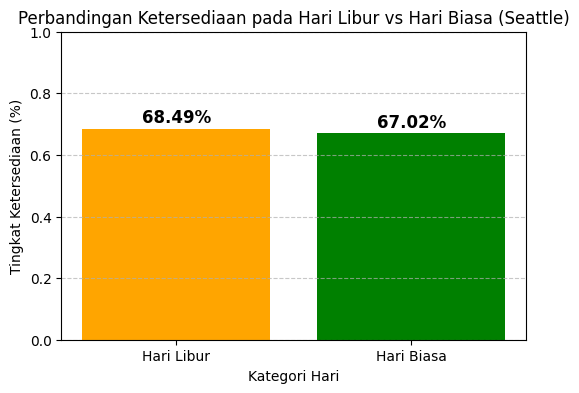

(137.79037752902732,
 137.94976462171664,
 0.6849373779703796,
 0.6701648154889269)

In [ ]:
# 1. Daftar hari libur resmi di Seattle berdasarkan tahun dalam dataset
# Mengambil tahun unik dari dataset untuk memastikan daftar hari libur yang relevan
unique_years = calendar_df['date'].dt.year.unique()

# Membuat daftar hari libur di Seattle untuk semua tahun yang ada dalam dataset
seattle_holidays = []
for year in unique_years:
    seattle_holidays.extend([
        f"{year}-01-01",  # New Year's Day
        f"{year}-01-20",  # Martin Luther King Jr. Day (third Monday of January, approximate)
        f"{year}-02-17",  # Presidents' Day (third Monday of February, approximate)
        f"{year}-05-26",  # Memorial Day (last Monday of May, approximate)
        f"{year}-06-19",  # Juneteenth
        f"{year}-07-04",  # Independence Day
        f"{year}-09-01",  # Labor Day (first Monday of September, approximate)
        f"{year}-10-13",  # Indigenous Peoples' Day (second Monday of October, approximate)
        f"{year}-11-11",  # Veterans Day
        f"{year}-11-27",  # Thanksgiving Day (fourth Thursday of November, approximate)
        f"{year}-12-25"   # Christmas Day
    ])

# 2. Mengonversi daftar hari libur ke format datetime
seattle_holidays = pd.to_datetime(seattle_holidays)

# 3. Menandai apakah suatu tanggal dalam calendar_df adalah hari libur di Seattle
calendar_df['is_holiday'] = calendar_df['date'].isin(seattle_holidays).astype(int)

# 4. Menghitung rata-rata harga pada hari libur dan hari biasa di Seattle
avg_price_holiday = calendar_df[calendar_df['is_holiday'] == 1]['price'].mean()
avg_price_non_holiday = calendar_df[calendar_df['is_holiday'] == 0]['price'].mean()

# 5. Menghitung tingkat ketersediaan pada hari libur vs hari biasa di Seattle
calendar_df['availability'] = calendar_df['available'].map({'t': 1, 'f': 0})  # Konversi 't' dan 'f' ke 1 dan 0
availability_holiday = calendar_df[calendar_df['is_holiday'] == 1]['availability'].mean()
availability_non_holiday = calendar_df[calendar_df['is_holiday'] == 0]['availability'].mean()

# 6. Visualisasi perbandingan harga rata-rata pada hari libur vs hari biasa di Seattle dengan angka di atas bar
plt.figure(figsize=(6, 4))
bars = plt.bar(['Hari Libur', 'Hari Biasa'], [avg_price_holiday, avg_price_non_holiday], color=['red', 'blue'])

# Menambahkan angka di atas setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'${bar.get_height():.2f}', ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Kategori Hari')
plt.ylabel('Rata-rata Harga ($)')
plt.title('Perbandingan Harga Rata-rata pada Hari Libur vs Hari Biasa (Seattle)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 7. Visualisasi tingkat ketersediaan pada hari libur vs hari biasa di Seattle dengan angka di atas bar
plt.figure(figsize=(6, 4))
bars = plt.bar(['Hari Libur', 'Hari Biasa'], [availability_holiday, availability_non_holiday], color=['orange', 'green'])

# Menambahkan angka di atas setiap bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02,
             f'{bar.get_height()*100:.2f}%', ha='center', fontsize=12, fontweight='bold')

plt.xlabel('Kategori Hari')
plt.ylabel('Tingkat Ketersediaan (%)')
plt.title('Perbandingan Ketersediaan pada Hari Libur vs Hari Biasa (Seattle)')
plt.ylim(0, 1)  # Karena availability dalam bentuk proporsi (0 - 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Menampilkan hasil rata-rata harga dan ketersediaan di Seattle
avg_price_holiday, avg_price_non_holiday, availability_holiday, availability_non_holiday


Hasil Analisis Dampak Hari Libur di Seattle terhadap Harga dan Ketersediaan
1. Dampak Hari Libur terhadap Harga

    Harga rata-rata pada hari libur: $137.79

    Harga rata-rata pada hari biasa: $137.95

    Tidak ada perbedaan yang signifikan dalam harga rata-rata antara hari libur dan hari biasa di Seattle.

2. Dampak Hari Libur terhadap Ketersediaan

    Tingkat ketersediaan pada hari libur: 68.49%
    
    Tingkat ketersediaan pada hari biasa: 67.02%

    Terdapat sedikit peningkatan tingkat ketersediaan pada hari libur dibandingkan hari biasa, tetapi perbedaannya tidak terlalu besar.

# **Analisis perbedaan harga per tipe ruangan**

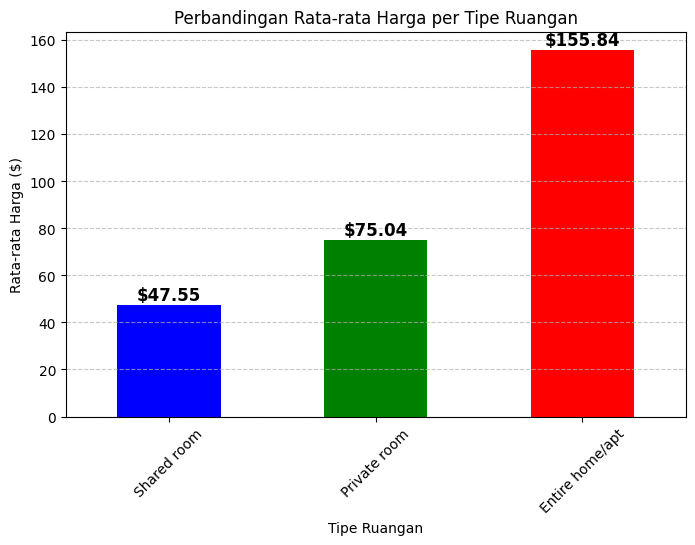

,price
room_type,
Shared room,47.547009
Private room,75.044828
Entire home/apt,155.843369


In [ ]:
# 1. Memeriksa kolom 'room_type' dan 'price' dalam listings_df
if 'room_type' in listings_df.columns and 'price' in listings_df.columns:
    # 2. Menghitung rata-rata harga per tipe ruangan
    avg_price_per_room_type = listings_df.groupby('room_type')['price'].mean().sort_values()

    # 3. Visualisasi perbedaan harga rata-rata per tipe ruangan dengan warna berbeda dan nilai di atas bar
    plt.figure(figsize=(8, 5))
    colors = ['blue', 'green', 'red']  # Warna untuk setiap kategori
    bars = avg_price_per_room_type.plot(kind='bar', color=colors)

    # Menambahkan nilai harga di atas setiap bar
    for bar in bars.patches:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
                 f'${bar.get_height():.2f}', ha='center', fontsize=12, fontweight='bold')

    # Label dan judul
    plt.xlabel('Tipe Ruangan')
    plt.ylabel('Rata-rata Harga ($)')
    plt.title('Perbandingan Rata-rata Harga per Tipe Ruangan')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Menampilkan plot
    plt.show()

    # Menampilkan nilai rata-rata harga per tipe ruangan
    avg_price_per_room_type
else:
    avg_price_per_room_type = "Kolom 'room_type' atau 'price' tidak ditemukan dalam dataset."

avg_price_per_room_type



Hasil Analisis Perbedaan Harga per Tipe Ruangan

- Shared Room (Kamar Bersama) memiliki harga rata-rata terendah sekitar $47.55.

- Private Room (Kamar Pribadi) memiliki harga rata-rata $75.04, lebih tinggi dibandingkan kamar bersama.

- Entire Home/Apt (Seluruh Rumah/Apartment) memiliki harga rata-rata tertinggi, sekitar $155.84.

Insight:

- Entire Home/Apt memiliki harga yang jauh lebih mahal dibandingkan Private Room dan Shared Room, yang masuk akal karena menawarkan privasi penuh.

- Shared Room adalah pilihan paling ekonomis, dengan harga rata-rata kurang dari setengah dari Private Room.

- Perbedaan harga ini bisa digunakan untuk memahami preferensi tamu dan strategi harga yang optimal untuk pemilik properti.